# Lab 1. 3375, Корня Игорь

## кластеризация K-means

Импорт необходимых библиотек и загрузка данных

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
df = pd.read_csv('WineQT.csv', sep=';')
df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


Проверка пропущенных значений, их количества и процентного соотношения

In [ ]:
missing_data = df.isnull().sum()
print("Пропущенные значения в каждой колонке:")
print(missing_data)

missing_percent = (missing_data / len(df) * 100).round(2)
print("\nПроцент пропущенных значений:")
print(missing_percent)

if missing_data.sum() > 0:
    plt.figure(figsize=(10, 5))
    sns.heatmap(df.isnull(), cbar=True, yticklabels=False, cmap='viridis')
    plt.title('Матрица пропущенных значений')
    plt.show()
else:
    print("\nПропущенных значений не обнаружено!")


Пропущенные значения в каждой колонке:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

Процент пропущенных значений:
fixed acidity           0.0
volatile acidity        0.0
citric acid             0.0
residual sugar          0.0
chlorides               0.0
free sulfur dioxide     0.0
total sulfur dioxide    0.0
density                 0.0
pH                      0.0
sulphates               0.0
alcohol                 0.0
quality                 0.0
Id                      0.0
dtype: float64

Пропущенных значений не обнаружено!


Базовая статистика основных числовых признаков

In [ ]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.drop('Id')

stats = df[numeric_cols].describe().T
stats['median'] = df[numeric_cols].median()
stats = stats[['count', 'mean', 'std', 'min', '25%', 'median', '75%', 'max']]
stats.round(3)


,count,mean,std,min,25%,median,75%,max
fixed acidity,1143.0,8.311,1.748,4.600,7.100,7.900,9.100,15.900
volatile acidity,1143.0,0.531,0.180,0.120,0.392,0.520,0.640,1.580
citric acid,1143.0,0.268,0.197,0.000,0.090,0.250,0.420,1.000
residual sugar,1143.0,2.532,1.356,0.900,1.900,2.200,2.600,15.500
chlorides,1143.0,0.087,0.047,0.012,0.070,0.079,0.090,0.611
free sulfur dioxide,1143.0,15.615,10.250,1.000,7.000,13.000,21.000,68.000
total sulfur dioxide,1143.0,45.915,32.782,6.000,21.000,37.000,61.000,289.000
density,1143.0,0.997,0.002,0.990,0.996,0.997,0.998,1.004
pH,1143.0,3.311,0.157,2.740,3.205,3.310,3.400,4.010
sulphates,1143.0,0.658,0.170,0.330,0.550,0.620,0.730,2.000


В данной части работы мы загрузили исходный датасет WineQT.csv, содержащий характеристики качества вин. Провели первоначальный обзор содержимого данных и типов столбцов, выявили, что пропущенных значений в датасете нет. Анализ статистики основных признаков показал разброс и распределение значений, что даст основу для дальнейшего анализа и очистки данных.

Добавление нового атрибута

In [ ]:
df['alcohol_to_acidity_ratio'] = df['alcohol'] / df['fixed acidity']

df[['alcohol', 'fixed acidity', 'alcohol_to_acidity_ratio']].head()


,alcohol,fixed acidity,alcohol_to_acidity_ratio
0,9.4,7.4,1.27027
1,9.8,7.8,1.25641
2,9.8,7.8,1.25641
3,9.8,11.2,0.87500
4,9.4,7.4,1.27027


In [ ]:
df['alcohol_to_acidity_ratio'].describe().round(3)


,alcohol_to_acidity_ratio
count,1143.000
mean,1.312
std,0.322
min,0.587
25%,1.097
50%,1.278
75%,1.462
max,2.857


В качестве нового атрибута был добавлен показатель отношения содержания алкоголя к фиксированной кислотности вина. Это может служить дополнительным фактором для анализа качества и группировки вин при кластеризации.

Удаление дубликатов

In [ ]:
num_duplicates = df.duplicated().sum()
print(f'Количество дубликатов в датасете: {num_duplicates}')

df = df.drop_duplicates()
print(f'Размер датасета после удаления дубликатов: {df.shape}')


Количество дубликатов в датасете: 0
Размер датасета после удаления дубликатов: (1143, 14)


Проверка и обработка пропущенных значений

In [ ]:
missing_after = df.isnull().sum()
print("Пропущенные значения после удаления дубликатов:")
print(missing_after)

if missing_after.sum() > 0:
    for col in df.columns:
        if df[col].isnull().sum() > 0:
            median_val = df[col].median()
            df[col].fillna(median_val, inplace=True)
    print("Пропущенные значения заменены медианой.")
else:
    print("Пропущенных значений после удаления дубликатов не обнаружено.")


Пропущенные значения после удаления дубликатов:
fixed acidity               0
volatile acidity            0
citric acid                 0
residual sugar              0
chlorides                   0
free sulfur dioxide         0
total sulfur dioxide        0
density                     0
pH                          0
sulphates                   0
alcohol                     0
quality                     0
Id                          0
alcohol_to_acidity_ratio    0
dtype: int64
Пропущенных значений после удаления дубликатов не обнаружено.


Обнаружение выбросов методом IQR

In [ ]:
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (data < lower_bound) | (data > upper_bound)
    return outliers, lower_bound, upper_bound

outliers_dict = {}
outlier_bounds = {}

numeric_columns = df.select_dtypes(include=[np.number]).columns.drop('Id')

print("Сводка по выбросам:")

for col in numeric_columns:
    outliers, lower, upper = detect_outliers_iqr(df[col])
    outliers_dict[col] = outliers
    outlier_bounds[col] = (lower, upper)
    count_outliers = outliers.sum()
    print(f"{col}: {count_outliers} выбросов ({count_outliers/len(df)*100:.2f}%)")


Сводка по выбросам:
fixed acidity: 44 выбросов (3.85%)
volatile acidity: 14 выбросов (1.22%)
citric acid: 1 выбросов (0.09%)
residual sugar: 110 выбросов (9.62%)
chlorides: 77 выбросов (6.74%)
free sulfur dioxide: 18 выбросов (1.57%)
total sulfur dioxide: 40 выбросов (3.50%)
density: 36 выбросов (3.15%)
pH: 20 выбросов (1.75%)
sulphates: 43 выбросов (3.76%)
alcohol: 12 выбросов (1.05%)
quality: 22 выбросов (1.92%)
alcohol_to_acidity_ratio: 37 выбросов (3.24%)


Визуализация выбросов (scatter plot и boxplot)

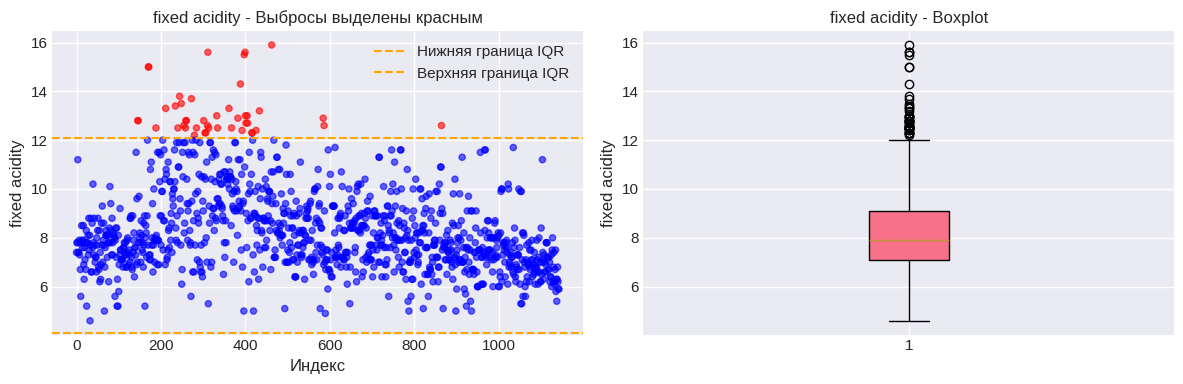

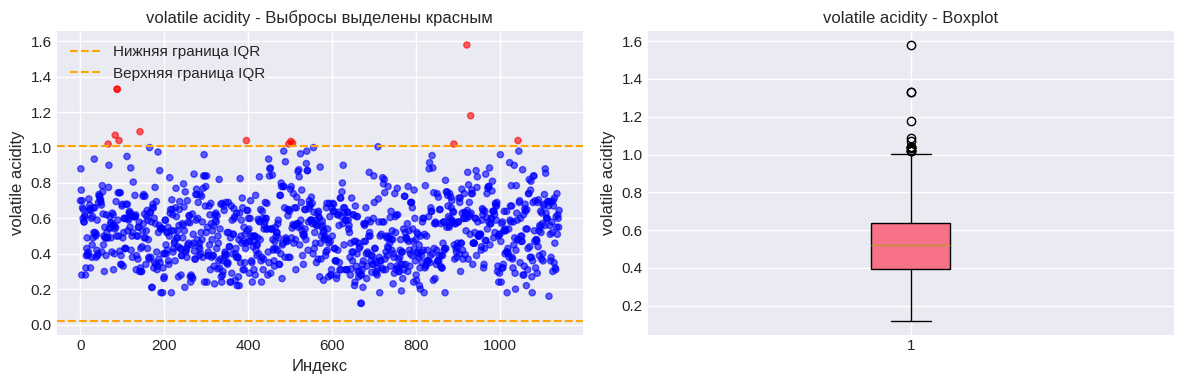

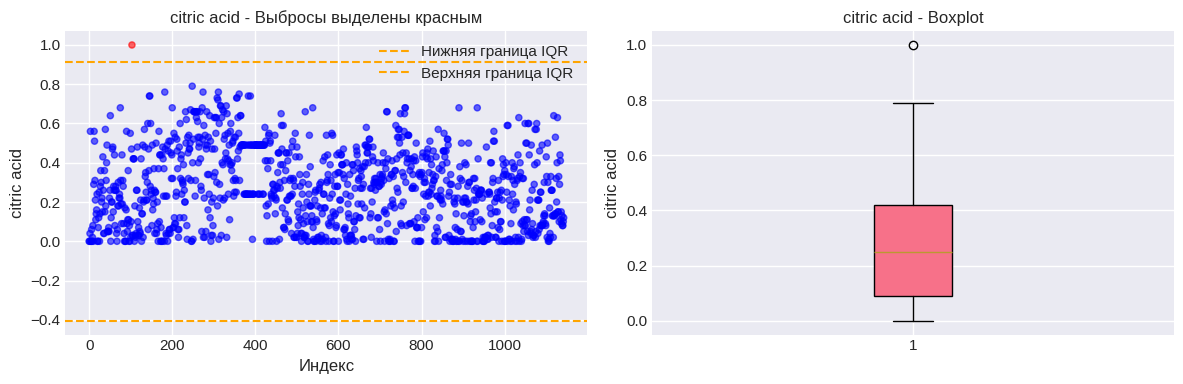

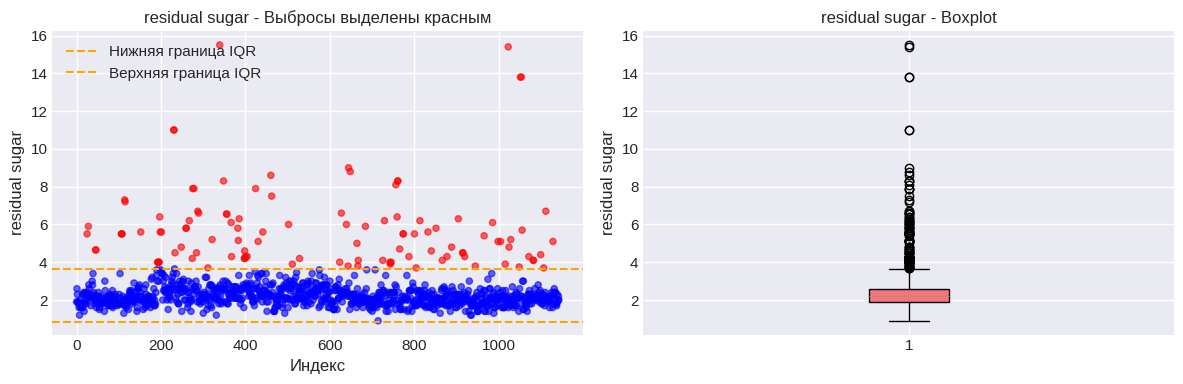

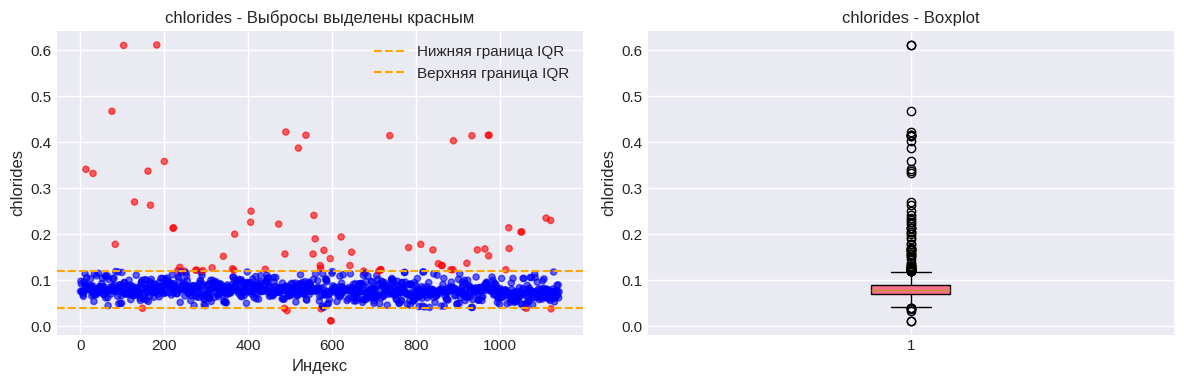

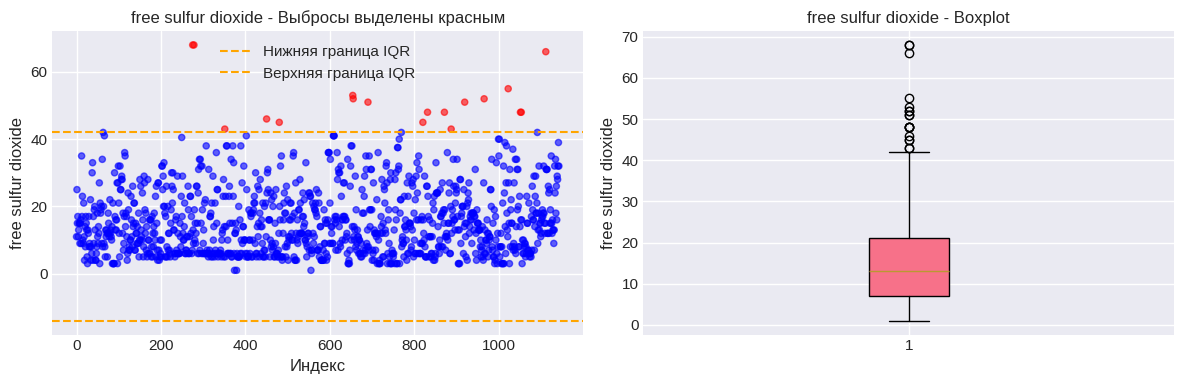

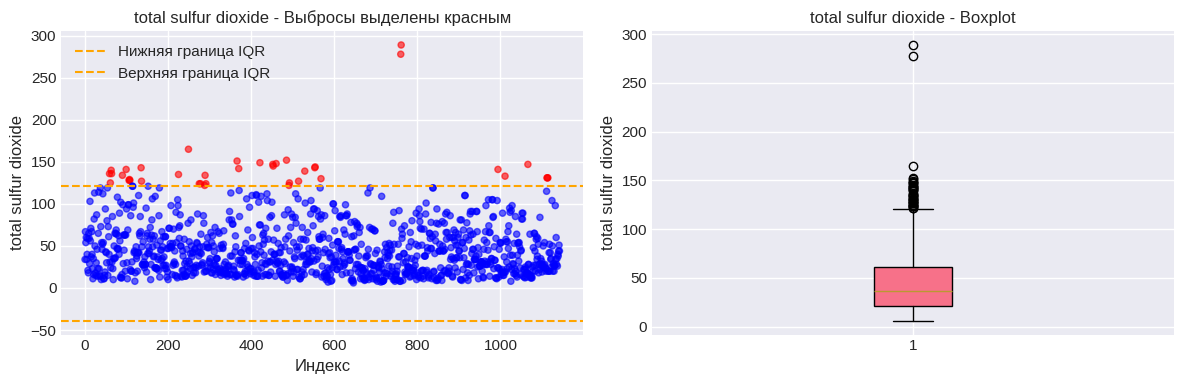

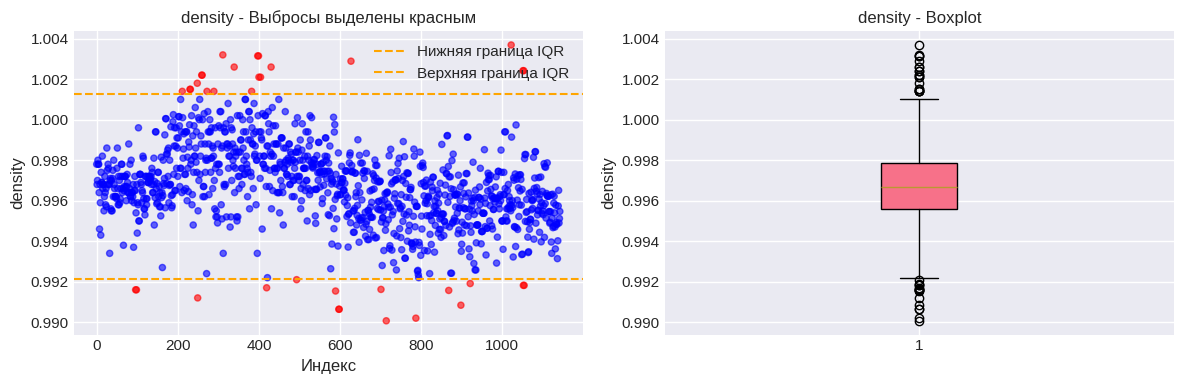

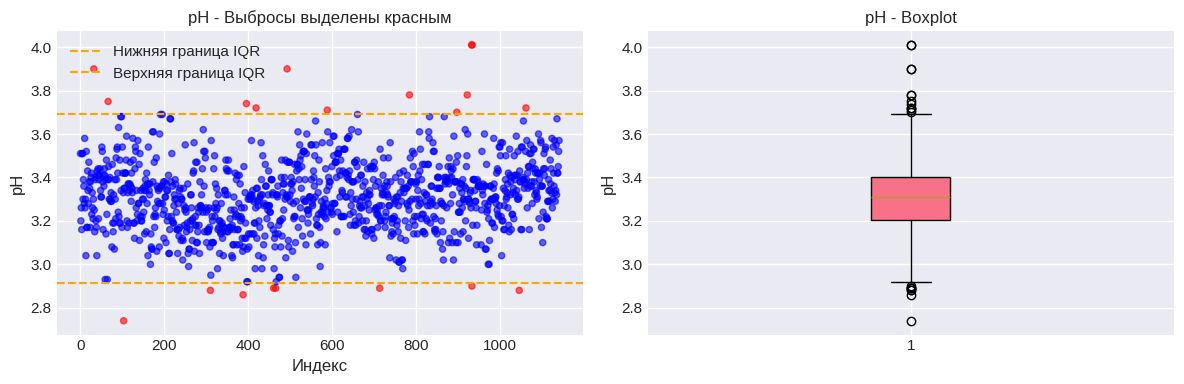

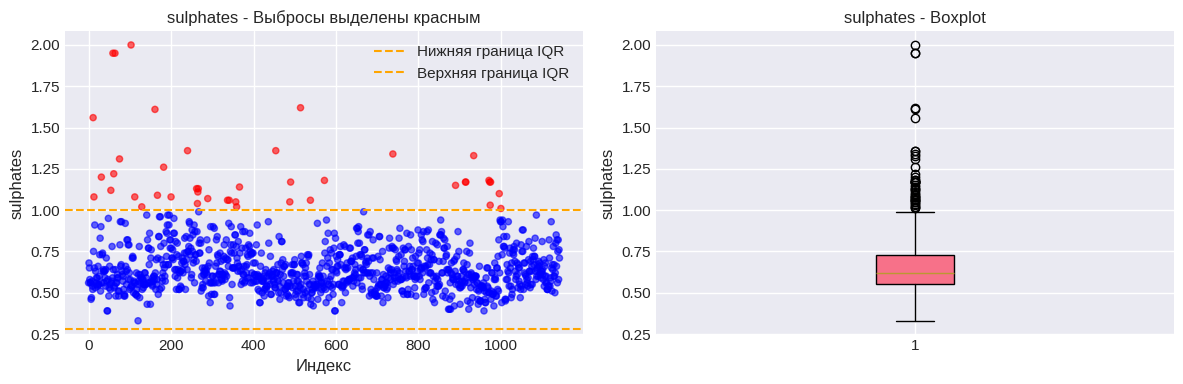

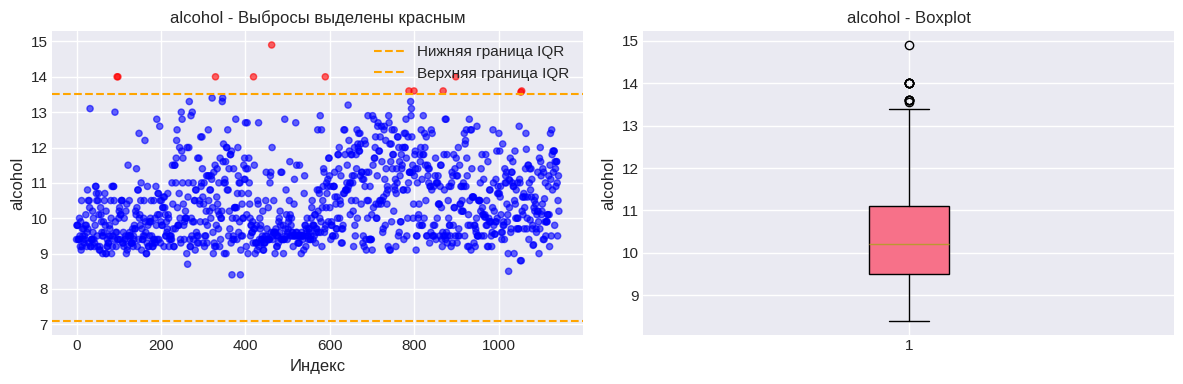

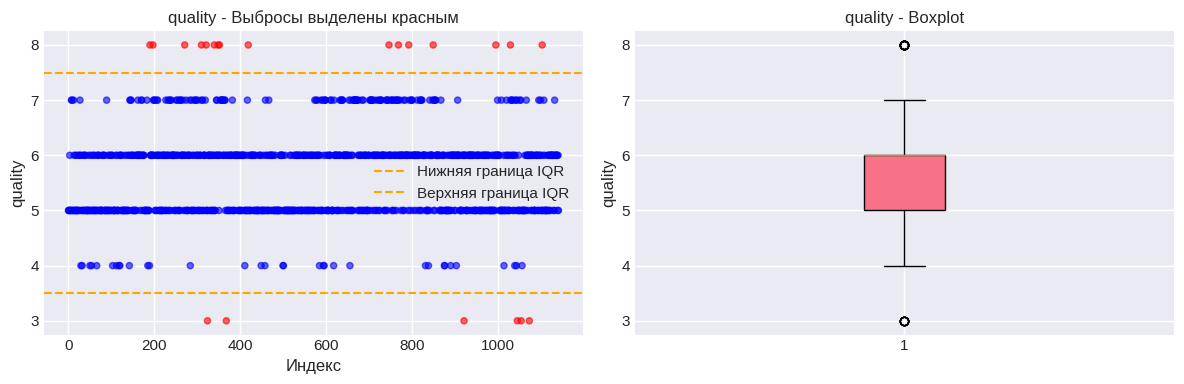

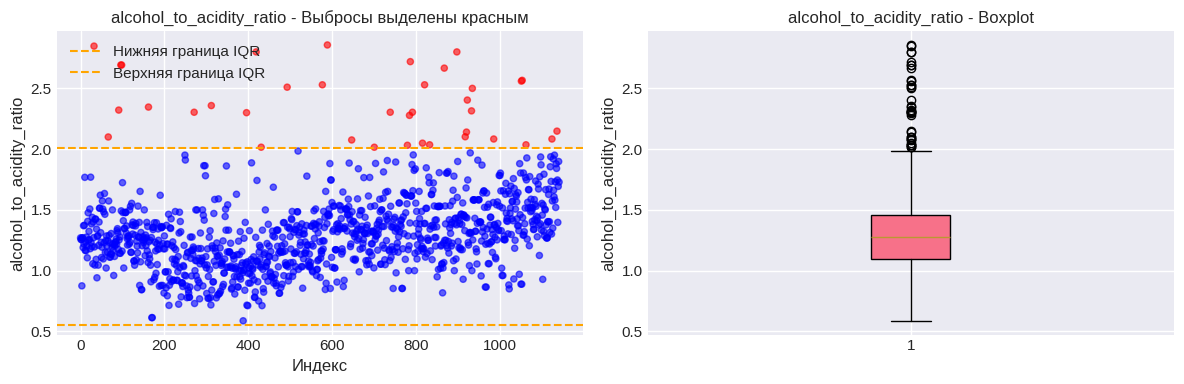

In [ ]:
for col in numeric_columns:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    data = df[col]
    outliers = outliers_dict[col]
    colors = ['red' if val else 'blue' for val in outliers]

    ax1.scatter(range(len(df)), data, c=colors, alpha=0.6, s=20)
    ax1.set_title(f'{col} - Выбросы выделены красным')
    ax1.set_xlabel('Индекс')
    ax1.set_ylabel(col)

    lower, upper = outlier_bounds[col]
    ax1.axhline(y=lower, color='orange', linestyle='--', label='Нижняя граница IQR')
    ax1.axhline(y=upper, color='orange', linestyle='--', label='Верхняя граница IQR')
    ax1.legend()

    ax2.boxplot(data, vert=True, patch_artist=True)
    ax2.set_title(f'{col} - Boxplot')
    ax2.set_ylabel(col)

    plt.tight_layout()
    plt.show()


На данном этапе мы удалили дубликаты, проверили отсутствие пропущенных значений, провели обнаружение выбросов методом межквартильного размаха (IQR). Визуализация показала распределение данных и выделила экстремальные значений для дальнейшего рассмотрения в анализе.

Построение scatter plot для ключевых пар переменных

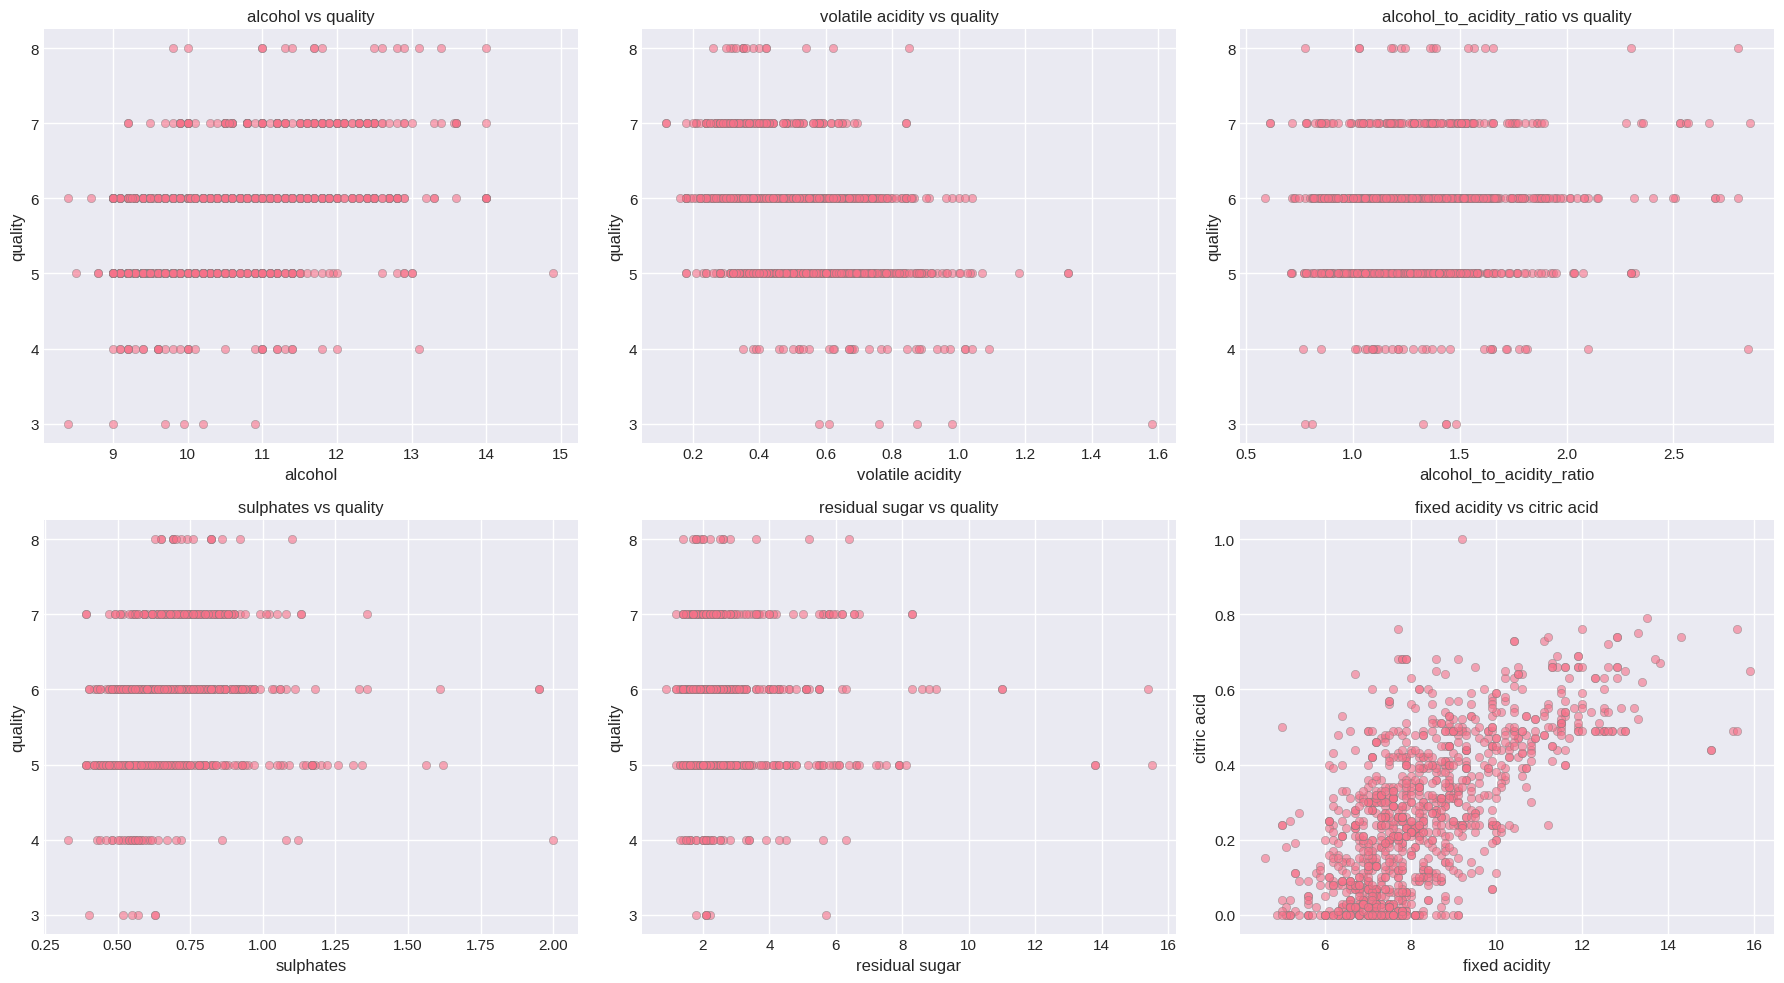

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

key_pairs = [
    ('alcohol', 'quality'),
    ('volatile acidity', 'quality'),
    ('alcohol_to_acidity_ratio', 'quality'),
    ('sulphates', 'quality'),
    ('residual sugar', 'quality'),
    ('fixed acidity', 'citric acid')
]

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for idx, (x, y) in enumerate(key_pairs):
    sns.scatterplot(data=df, x=x, y=y, alpha=0.6, ax=axes[idx], edgecolor='gray')
    axes[idx].set_title(f'{x} vs {y}')
plt.tight_layout()
plt.show()


Построение pairplot для всех числовых переменных

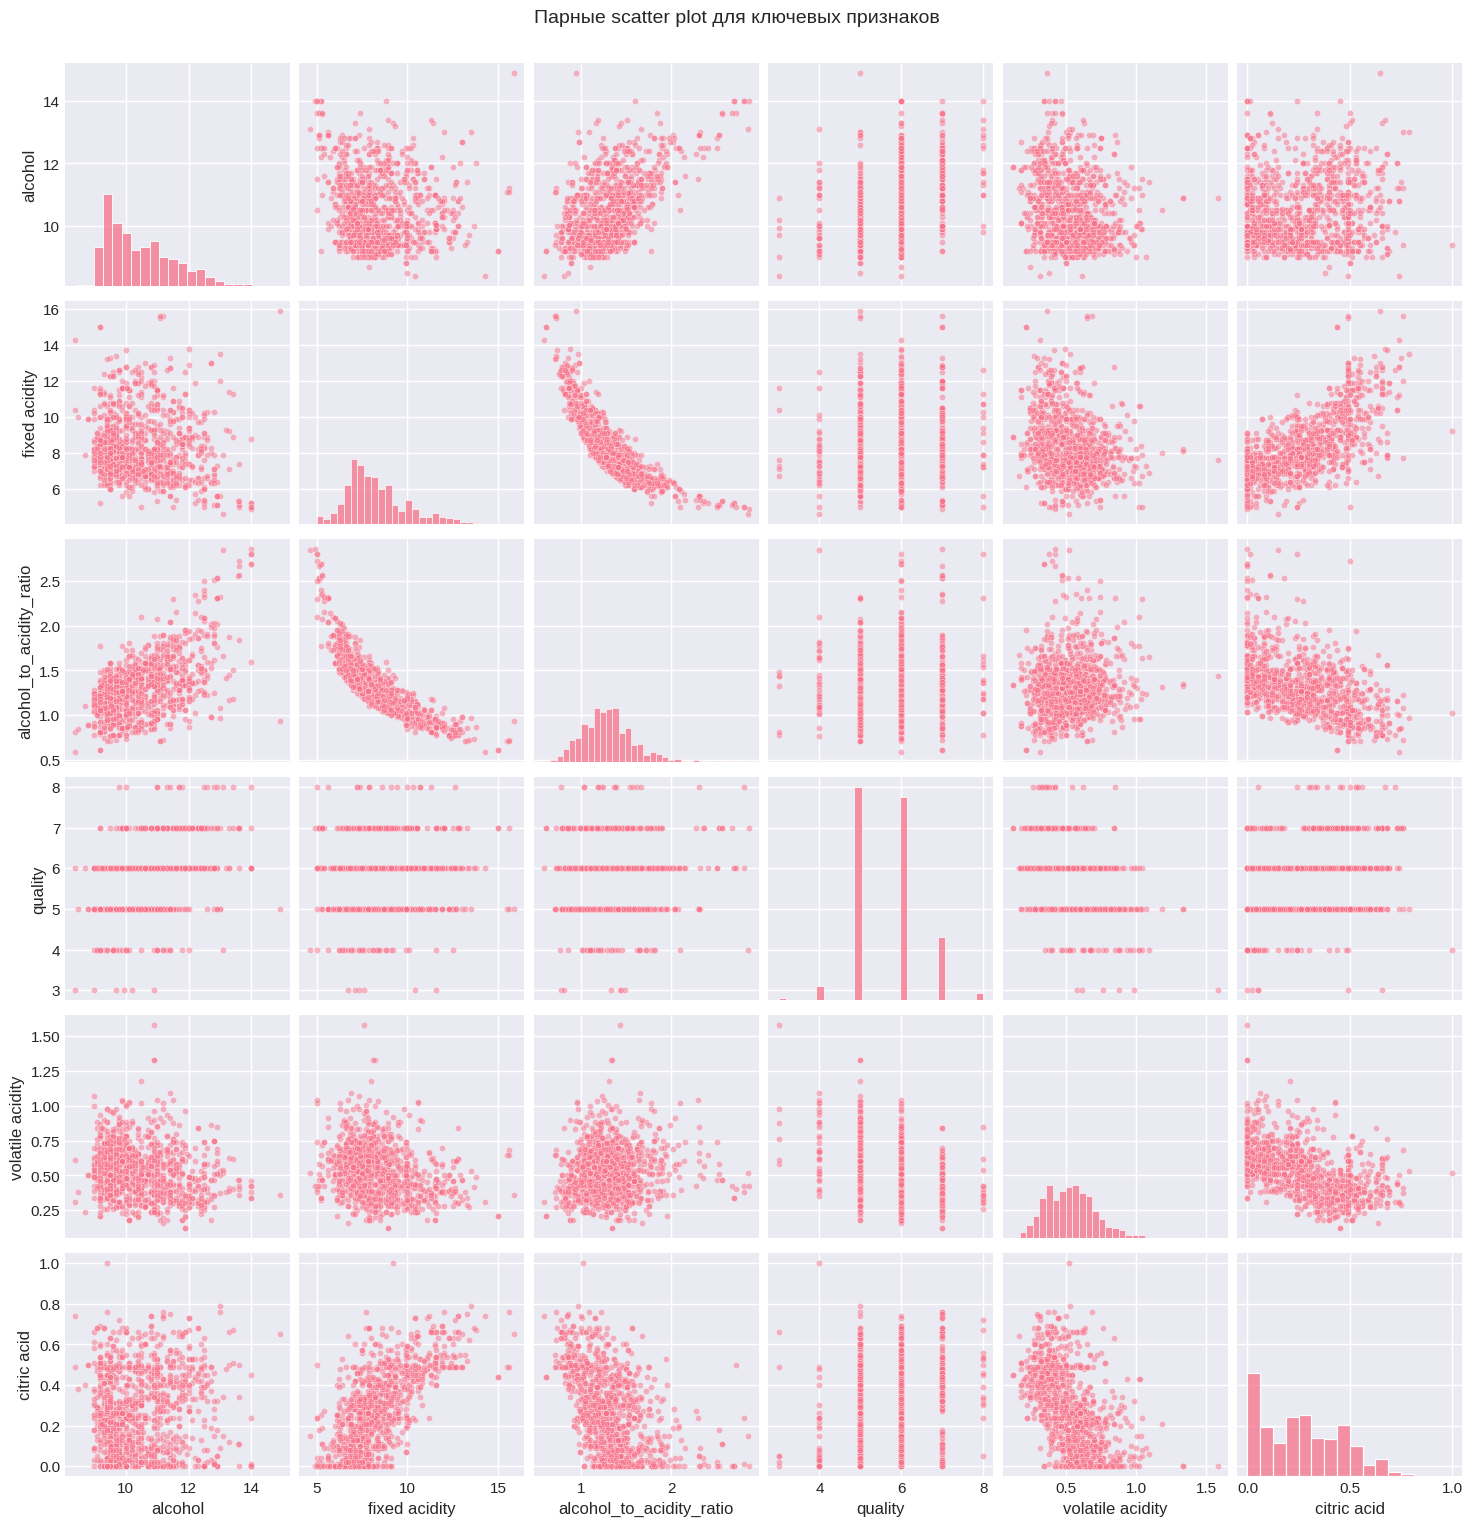

In [ ]:
sns.pairplot(df[['alcohol', 'fixed acidity', 'alcohol_to_acidity_ratio', 'quality', 'volatile acidity', 'citric acid']],
             diag_kind='hist',
             plot_kws={'alpha': 0.5, 's': 20})
plt.suptitle('Парные scatter plot для ключевых признаков', fontsize=14, y=1.02)
plt.show()


На этапе визуализации данных построены scatter plot для ключевых пар переменных. Это позволяет выявить тенденции и визуально оценить возможные группы (кластеры) в данных. Дополнительно построен pairplot для важных характеристик вина с учетом вновь созданного атрибута.

Масштабирование данных

In [ ]:
from sklearn.preprocessing import StandardScaler

features_for_clustering = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
                           'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
                           'pH', 'sulphates', 'alcohol', 'alcohol_to_acidity_ratio']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features_for_clustering])


пределение оптимального числа кластеров (локоть)

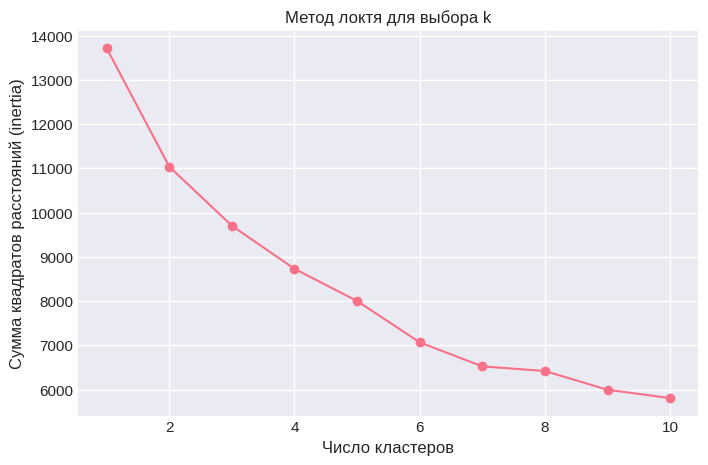

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia_list = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia_list.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K_range, inertia_list, marker='o')
plt.xlabel('Число кластеров')
plt.ylabel('Сумма квадратов расстояний (inertia)')
plt.title('Метод локтя для выбора k')
plt.show()


Кластеризация данных

In [ ]:
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

df['kmeans_cluster'] = clusters
print(df['kmeans_cluster'].value_counts())


kmeans_cluster
0    563
2    294
1    286
Name: count, dtype: int64


На этапе кластеризации данные были предварительно масштабированы для повышения корректности работы алгоритма KMeans. Метод локтя показал оптимальное число кластеров — далее применен алгоритм KMeans, а результаты добавлены в виде нового столбца "kmeans_cluster".

Визуализация кластеров (scatter plot для нескольких пар признаков)

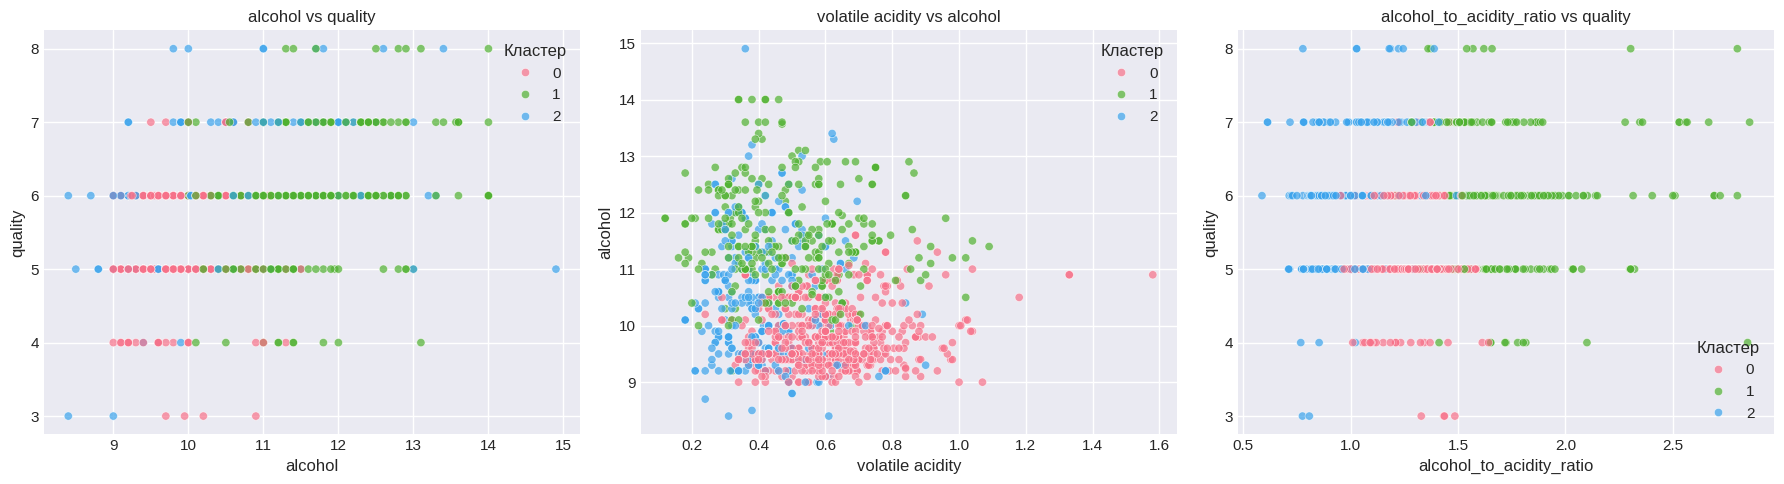

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

cluster_palette = sns.color_palette('husl', n_colors=3)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
pairs_to_plot = [
    ('alcohol', 'quality'),
    ('volatile acidity', 'alcohol'),
    ('alcohol_to_acidity_ratio', 'quality')
]

for idx, (x, y) in enumerate(pairs_to_plot):
    sns.scatterplot(data=df, x=x, y=y, hue='kmeans_cluster', palette=cluster_palette, ax=axes[idx], alpha=0.7)
    axes[idx].set_title(f'{x} vs {y}')
    axes[idx].legend(title='Кластер')
plt.tight_layout()
plt.show()


Анализ средних значений параметров по кластерам

In [ ]:
print(df.groupby('kmeans_cluster')[features_for_clustering + ['quality']].mean().round(3))


                fixed acidity  volatile acidity  citric acid  residual sugar  \
kmeans_cluster                                                                 
0                       7.840             0.612        0.176           2.412   
1                       7.013             0.491        0.216           2.332   
2                      10.475             0.417        0.497           2.956   

                chlorides  free sulfur dioxide  total sulfur dioxide  density  \
kmeans_cluster                                                                  
0                   0.084               16.639                53.736    0.997   
1                   0.070               17.288                41.559    0.995   
2                   0.109               12.027                35.173    0.998   

                   pH  sulphates  alcohol  alcohol_to_acidity_ratio  quality  
kmeans_cluster                                                                
0               3.330      0.598   

Краткое описание кластеров

In [ ]:
for cl in sorted(df['kmeans_cluster'].unique()):
    size = (df['kmeans_cluster'] == cl).sum()
    mean_quality = df[df['kmeans_cluster'] == cl]['quality'].mean().round(3)
    print(f'Кластер {cl}: {size} объектов, среднее качество = {mean_quality}')


Кластер 0: 563 объектов, среднее качество = 5.318
Кластер 1: 286 объектов, среднее качество = 6.038
Кластер 2: 294 объектов, среднее качество = 5.935


Результаты кластеризации визуализированы с помощью scatter plot для основных переменных — видно, что кластеры имеют различное распределение по признакам. По средним значениям параметров можно проанализировать специфику каждого кластера — например, один может отличаться высокими показателями алкоголя или кислотности. Числовой анализ по среднему качеству в каждом кластере позволяет выявить особенности и интерпретировать группы, полученные KMeans.

Основные закономерности, найденные в данных:

1. Алгоритм KMeans разделил все вина на 3 кластера, каждый из которых имеет отчетливую "траекторию" свойств.
2. Кластер 0 (563 экземпляра, среднее качество 5.32) — это вина с наиболее низким содержанием алкоголя, высокой летучей кислотностью, низкой лимонной кислотой и умеренными остальными характеристиками. Это самый массовый и "средний" по всем компонентам кластер, среди вин чаще встречается оценка "5" по качеству.
3. Кластер 1 (286 экземпляров, среднее качество 6.04) — это вина с высоким содержанием алкоголя, низкой кислотностью и летучими кислотами, довольно высокой долей сульфатов и высоким отношением alcohol_to_acidity_ratio. Среди них больше всего образцов с высокой оценкой качества (6 и выше). Это "лучший" кластер.
4. Кластер 2 (294 экземпляра, среднее качество 5.94) отличается высокой фиксированной и лимонной кислотностью и высокой плотностью, а также умеренным содержанием алкоголя. Этот сегмент выделяется отличиями кислотности, а по качеству занимает промежуточное положение между кластером 1 и 0.

Интерпретация кластеров и их значимости:

- Кластер 1 однозначно выделяется как группа вин с лучшими органолептическими характеристиками: выше alcohol, ниже летучая кислотность, лучше оценка.
- Кластер 2 — вина более кислые, характерные для определенного типа продукции, и несмотря на большую кислотность, многие остаются в "выше среднего" по оценке.
- Кластер 0 — обычные столовые вина умеренного качества, у которых никаких выраженных характеристик нет, поэтому средний балл наименьший.

Выводы по кластерному анализу:

- Кластеризация показала, что для повышения качества вина стоит стремиться снижать летучую кислотность и повышать содержание алкоголя (сохраняя при этом оптимальное соотношение с кислотностью).
- Для задач сегментации и дифференциации продукции такой подход помогает выявить перспективные группы для премиальных линеек (кластер 1), а также определить, какие технологические параметры влияют на качество больше всего.
- Полученные кластеры можно использовать для дифференцированной маркетинговой стратегии, разработки новых сортов или рекомендаций по корректировке технологических процессов.

